In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0302"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 438 ms, sys: 17.7 ms, total: 456 ms
Wall time: 458 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.000000,0.000406,0.00000,-0.014003,0.000000e+00,-0.006570,0.0,-0.015622,0.0,-0.004524,...,0.0,-0.003171,0.0,-0.016560,0.0,-0.001557,0.0,-0.001128,0.0,-0.002171
1,0.009946,-0.003737,0.00376,-0.004209,0.000000e+00,0.000860,0.0,-0.007392,0.0,0.000756,...,0.0,0.000038,0.0,-0.005749,0.0,-0.001955,0.0,-0.000066,0.0,0.001649
2,0.000000,-0.009951,0.00000,-0.013025,0.000000e+00,-0.001112,0.0,-0.001699,0.0,0.005250,...,0.0,-0.000749,0.0,-0.007453,0.0,0.002822,0.0,-0.002384,0.0,-0.003483
3,0.000037,0.009409,0.00455,-0.002757,7.131669e-07,-0.001423,0.0,0.018110,0.0,0.000588,...,0.0,0.000644,0.0,-0.002185,0.0,-0.000807,0.0,0.000506,0.0,0.006351
4,0.000000,-0.002583,0.00000,0.000919,0.000000e+00,-0.002117,0.0,0.002515,0.0,0.002888,...,0.0,-0.001638,0.0,-0.000671,0.0,0.003193,0.0,0.000761,0.0,0.005511


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009946,0.00376,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,5.447757e-01,0.241312,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.00455,7.131669e-07,0.0,0.0,0.000001,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000658,0.680220,2.456316e-03,0.000000,0.0,...,0.0,0.0,0.147283,0.108888,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009996,0.003767,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,7.242216e-01,0.272918,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.004561,7.131672e-07,0.000000,0.000000,1.256399e-06,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.585136e-04,0.974312,2.459335e-03,0.000000,0.0,...,0.0,0.0,0.158682,0.115037,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000e+00,0.000154,0.983625,8.035206e-03,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.517342,2.713586e-01,0.000000,0.000000,1.334030e-07,0.242338,3.136316e-02,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    49.000000
1    49.000005
2    53.999570
3    50.042349
4    43.000009
5    48.000573
6    36.999999
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000406,-0.014003,-0.006570,-0.015622,-0.004524,-0.004993,0.026482,-0.065087,0.002783,-0.005009,...,-0.009462,0.000986,0.005585,-0.004138,-0.003268,-0.003171,-0.016560,-0.001557,-0.001128,-0.002171
1,-0.003737,-0.004209,0.000860,-0.007392,0.000756,0.019516,0.026406,-0.037464,-0.000386,0.000102,...,-0.008709,0.001821,-0.003597,0.004687,-0.005976,0.000038,-0.005749,-0.001955,-0.000066,0.001649
2,-0.009951,-0.013025,-0.001112,-0.001699,0.005250,0.009668,0.043802,-0.051859,-0.006797,-0.008846,...,0.008373,-0.000410,-0.008525,0.006630,-0.011689,-0.000749,-0.007453,0.002822,-0.002384,-0.003483
3,0.009409,-0.002757,-0.001423,0.018110,0.000588,0.004813,0.033242,-0.080701,0.002421,0.011382,...,-0.000441,0.001169,-0.002531,0.008617,-0.007010,0.000644,-0.002185,-0.000807,0.000506,0.006351
4,-0.002583,0.000919,-0.002117,0.002515,0.002888,-0.004001,0.021604,-0.100867,0.006259,0.003044,...,0.006010,0.002481,-0.003685,0.012787,-0.000414,-0.001638,-0.000671,0.003193,0.000761,0.005511


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000406,-0.013905,-0.006549,-0.015501,-0.004514,-0.004980,0.026835,-0.063014,0.002787,-0.004997,...,-0.009417,0.000986,0.005601,-0.004130,-0.003262,-0.003166,-0.016423,-0.001556,-0.001127,-0.002169
1,-0.003730,-0.004200,0.000861,-0.007365,0.000756,0.019708,0.026757,-0.036771,-0.000386,0.000102,...,-0.008671,0.001823,-0.003591,0.004698,-0.005958,0.000038,-0.005733,-0.001953,-0.000066,0.001650
2,-0.009901,-0.012941,-0.001111,-0.001697,0.005264,0.009715,0.044775,-0.050537,-0.006773,-0.008807,...,0.008408,-0.000410,-0.008489,0.006652,-0.011621,-0.000749,-0.007425,0.002826,-0.002381,-0.003477
3,0.009454,-0.002753,-0.001421,0.018275,0.000588,0.004825,0.033801,-0.077530,0.002424,0.011447,...,-0.000441,0.001170,-0.002528,0.008654,-0.006985,0.000644,-0.002183,-0.000807,0.000506,0.006371
4,-0.002580,0.000919,-0.002115,0.002518,0.002892,-0.003993,0.021839,-0.095947,0.006279,0.003049,...,0.006028,0.002485,-0.003679,0.012869,-0.000414,-0.001637,-0.000671,0.003199,0.000761,0.005526
5,-0.004346,0.006425,0.000045,0.015056,0.002416,0.006778,0.047195,-0.037041,0.006379,0.005499,...,-0.002541,0.003597,-0.006953,0.009374,0.001483,-0.000637,0.000943,-0.001355,0.002409,0.007068
6,-0.000539,-0.003299,-0.001807,0.002916,0.002031,0.008357,0.026699,-0.026942,0.005785,0.002008,...,0.002412,0.001346,-0.005463,0.006973,-0.002866,0.001133,0.001459,0.001561,0.000239,0.001589


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000406,0.000000,0.000000,0.000000,0.000000,0.000000,0.026835,0.0,0.002787,0.000000,...,0.000000,0.000986,0.005601,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000861,0.000000,0.000756,0.019708,0.026757,0.0,0.000000,0.000102,...,0.000000,0.001823,0.000000,0.004698,0.0,0.000038,0.0,0.000000,0.000000,0.001650
2,0.000000,0.000000,0.000000,0.000000,0.005264,0.009715,0.044775,0.0,0.000000,0.000000,...,0.008408,0.000000,0.000000,0.006652,0.0,0.000000,0.0,0.002826,0.000000,0.000000
3,0.009454,0.000000,0.000000,0.018275,0.000588,0.004825,0.033801,0.0,0.002424,0.011447,...,0.000000,0.001170,0.000000,0.008654,0.0,0.000644,0.0,0.000000,0.000506,0.006371
4,0.000000,0.000919,0.000000,0.002518,0.002892,0.000000,0.021839,0.0,0.006279,0.003049,...,0.006028,0.002485,0.000000,0.012869,0.0,0.000000,0.0,0.003199,0.000761,0.005526


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    29.510678
1    31.120250
2    33.588243
3    28.402950
4    25.410945
5    30.143601
6    28.597585
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,49.000000,29.510678
1,49.000005,31.120250
2,53.999570,33.588243
3,50.042349,28.402950
4,43.000009,25.410945
5,48.000573,30.143601
6,36.999999,28.597585


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

18.060423878917423

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

17.609750446646153

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.6495669609436917, pvalue=0.11432944683553677)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-11.470265553418496

##### Coverages and widths for the forecasted values?

In [42]:
# Should we get the interval preds in the same thinking way too?

In [43]:
# maybe we should - so first convert to data scale before avearging, and see if the measures differ a lot

In [44]:
# for this we need the all_forecasts npy files

In [45]:
# content location is the same path as above

In [46]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [47]:
# all_forecasts_npy_files

In [48]:
# load the npy files

In [49]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 260 ms, sys: 79.9 ms, total: 340 ms
Wall time: 341 ms


In [50]:
len(loaded_npy_files)

910

In [51]:
loaded_npy_files[0].shape

(1000, 7)

In [52]:
loaded_npy_files[0]

array([[-0.00061589, -0.0029192 , -0.00836349, ...,  0.00135469,
        -0.00155008,  0.00212348],
       [ 0.00032151, -0.00338179, -0.00896931, ...,  0.00050545,
        -0.00170571,  0.00186944],
       [-0.00110137, -0.00318253, -0.00989032, ...,  0.00070822,
        -0.00124848,  0.00151348],
       ...,
       [ 0.00241232, -0.00316894, -0.00725418, ...,  0.00019825,
         0.00085306,  0.00280511],
       [ 0.00139964, -0.00432777, -0.00618887, ...,  0.00163162,
         0.0017525 ,  0.00336897],
       [ 0.00276935, -0.00329357, -0.00725466, ...,  0.00216377,
         0.00215101,  0.00362253]], dtype=float32)

In [53]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 19.7 ms, sys: 1.8 ms, total: 21.5 ms
Wall time: 20.8 ms


In [54]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.00135469, 0.        ,
        0.00212348],
       [0.00032151, 0.        , 0.        , ..., 0.00050545, 0.        ,
        0.00186944],
       [0.        , 0.        , 0.        , ..., 0.00070822, 0.        ,
        0.00151348],
       ...,
       [0.00241232, 0.        , 0.        , ..., 0.00019825, 0.00085306,
        0.00280511],
       [0.00139964, 0.        , 0.        , ..., 0.00163162, 0.0017525 ,
        0.00336897],
       [0.00276935, 0.        , 0.        , ..., 0.00216377, 0.00215101,
        0.00362253]], dtype=float32)

In [55]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [56]:
output.shape

(1000, 7)

In [57]:
output

array([[41.080204, 39.277733, 45.920353, ..., 41.960224, 47.028404,
        47.28497 ],
       [34.2286  , 33.974686, 37.741333, ..., 32.222267, 39.55074 ,
        39.518513],
       [40.281746, 38.996315, 45.65364 , ..., 45.526756, 49.538773,
        46.200645],
       ...,
       [37.178005, 38.94179 , 39.98628 , ..., 37.196354, 40.84136 ,
        45.260902],
       [32.27748 , 35.21263 , 44.615685, ..., 38.903286, 38.08326 ,
        38.045563],
       [37.069893, 40.18003 , 42.62774 , ..., 38.45881 , 42.244415,
        41.691006]], dtype=float32)

In [58]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [59]:
output_alt.shape

(1000, 7)

In [60]:
output_alt

array([[41.080204, 39.277733, 45.920353, ..., 41.960224, 47.028404,
        47.28497 ],
       [34.2286  , 33.974686, 37.741333, ..., 32.222267, 39.55074 ,
        39.518513],
       [40.281746, 38.996315, 45.65364 , ..., 45.526756, 49.538773,
        46.200645],
       ...,
       [37.178005, 38.94179 , 39.98628 , ..., 37.196354, 40.84136 ,
        45.260902],
       [32.27748 , 35.21263 , 44.615685, ..., 38.903286, 38.08326 ,
        38.045563],
       [37.069893, 40.18003 , 42.62774 , ..., 38.45881 , 42.244415,
        41.691006]], dtype=float32)

In [61]:
np.mean(output_alt == output)

1.0

In [62]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [63]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [64]:
li_train

array([[27.52892632],
       [27.83315978],
       [27.88376327],
       [26.18897443],
       [24.24372358],
       [27.12107015],
       [26.36696072]])

In [65]:
ui_train

array([[45.7587966 ],
       [46.69838505],
       [49.64164848],
       [51.33611479],
       [47.48712578],
       [50.34828138],
       [51.55449448]])

In [66]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [67]:
avg_width_train

22.236895472662784

In [68]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.5714285714285714

In [71]:
np.mean(output, axis = 0)

array([36.07229 , 36.596573, 38.47735 , 37.47604 , 34.641052, 37.863823,
       38.24346 ], dtype=float32)

In [72]:
# sum_forecasted_values

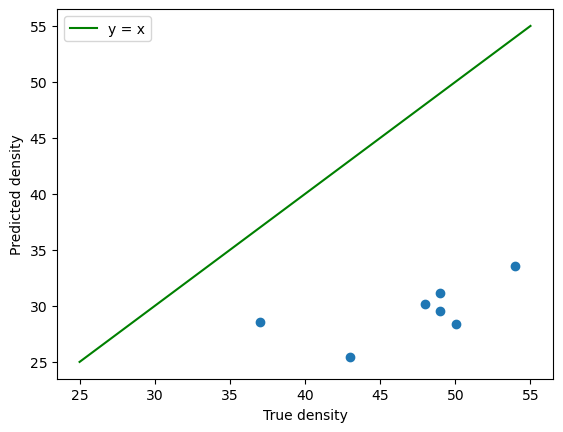

In [76]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([25, 55], [25, 55], color='green', label='y = x')
plt.legend()
plt.show()

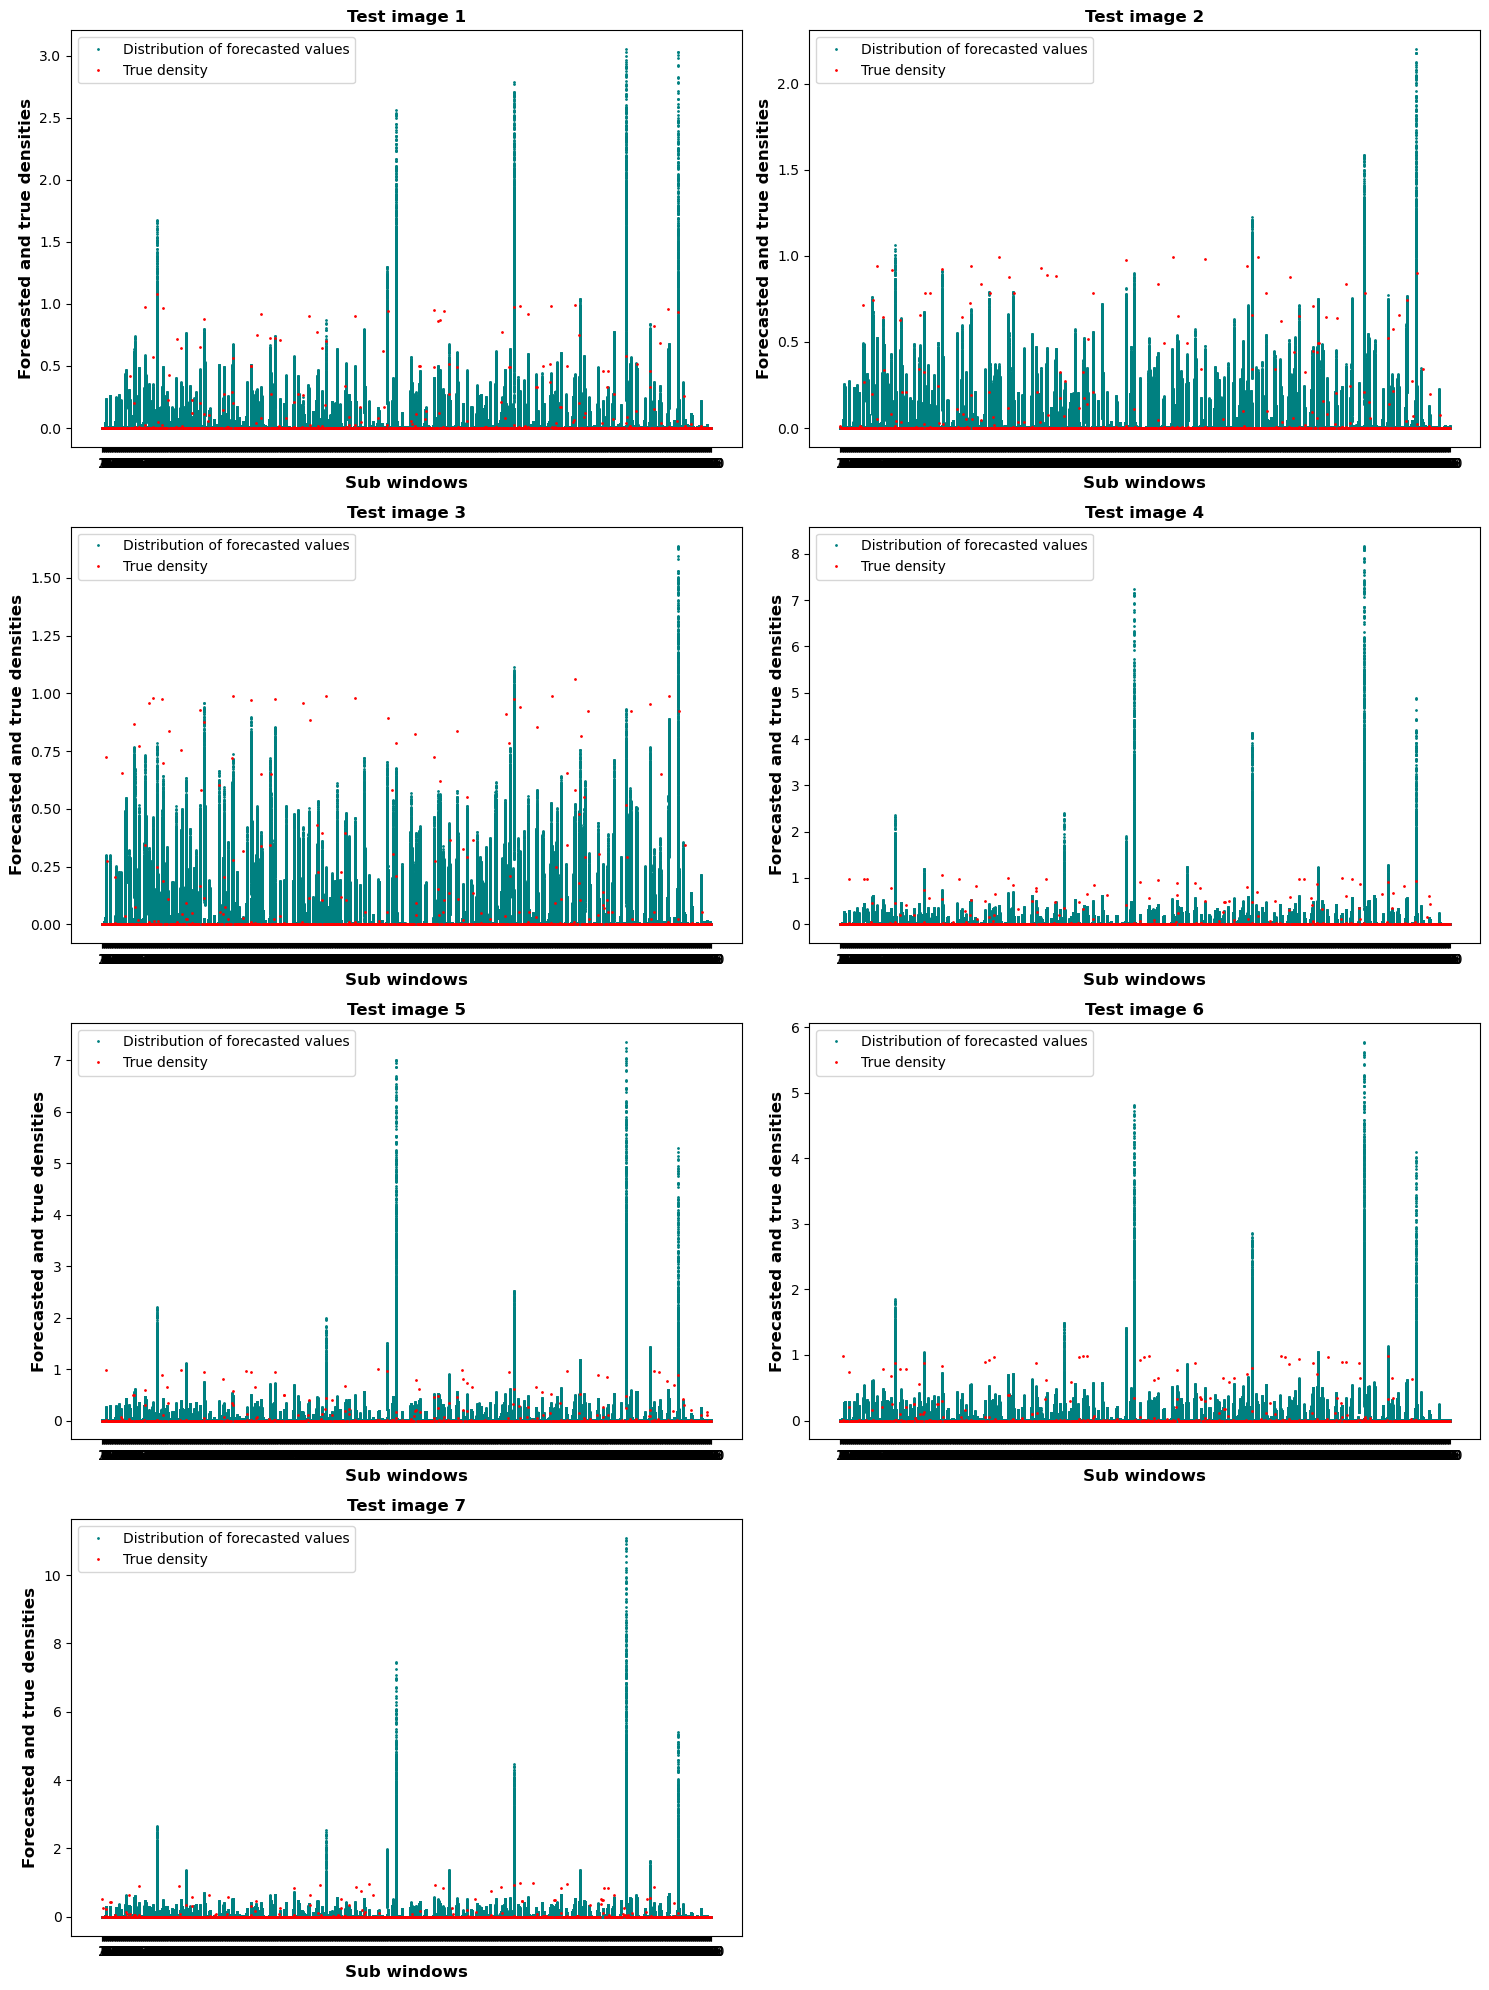

CPU times: user 27.3 s, sys: 722 ms, total: 28 s
Wall time: 27.7 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots